In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
train = pd.read_csv('Resources/train.csv')
test = pd.read_csv('Resources/test.csv')
gender = pd.read_csv('Resources/gender_submission.csv')

train.describe()
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [21]:
# Adding a train_test row in the dataset, initializing it as 1 in train set n as 0 in test set
train['train_test'] = 1
test['train_test'] = 0
# setting Survived to Nan in test set
test['Survived'] = np.NaN
# now combined the both dataset
all_data = pd.concat([train,test])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
train_test     False
dtype: bool

## Data Exploration and EDA
##### data .info() and .describe()
##### value counts, missing data
##### Histograms and Box plots
##### Correlation metrics


### LIGHT DATA EXPLORATION 
#### 1. For Numerical data 
##### Histograms 
##### Corrplot
##### Pivot table comparing Survival against other numerical data

#### 2. For Categorical data
##### Bar charts
##### Pivot table compring Survival against Categorical values

In [25]:
all_data.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [26]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
train_test     False
dtype: bool

## Some insights on data
#### string type columns : Name, Sex, Ticket, Cabin, Embarked
#### columns having null values : Age, Fare, Cabin, 


In [27]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [35]:
#df_num = train[train.describe().columns]
df_num = train[['Age','SibSp','Parch','Fare']]
df_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

Age


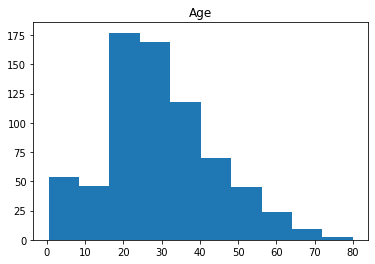

SibSp


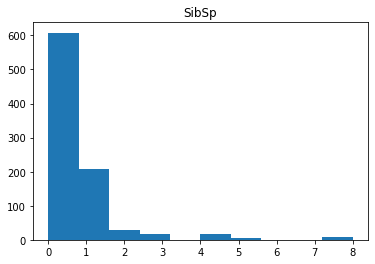

Parch


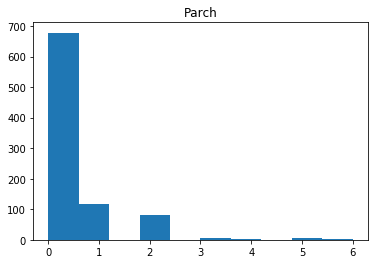

Fare


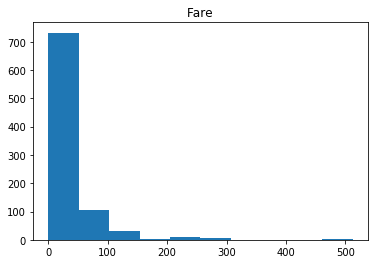

In [37]:
# distributions for all numrical columns 
for i in df_num.columns:
    print(i)
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


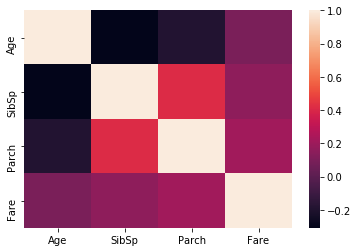

In [38]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [40]:
pd.pivot_table(train, index='Survived', values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


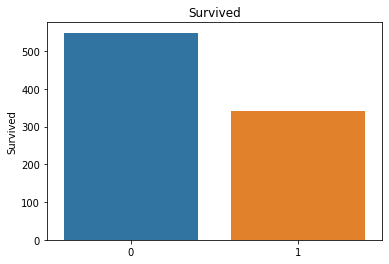

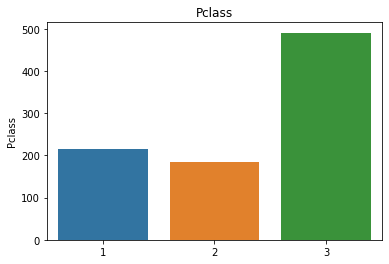

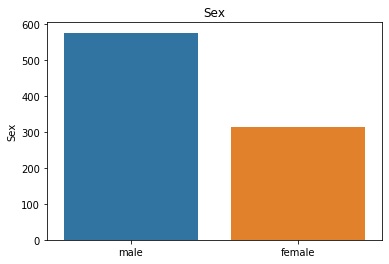

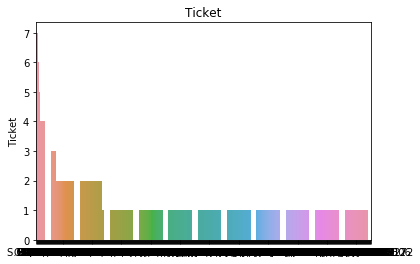

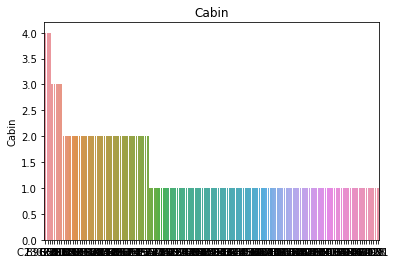

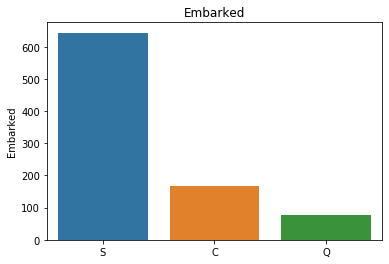

CA. 2343      7
347082        7
1601          7
347088        6
CA 2144       6
             ..
A./5. 2152    1
315090        1
248733        1
12233         1
17764         1
Name: Ticket, Length: 681, dtype: int64

In [43]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()
    

In [49]:
df_cat['Ticket'].value_counts() # 681 values
df_cat['Cabin'].value_counts() # 147 values

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C118           1
C110           1
C99            1
D28            1
D21            1
Name: Cabin, Length: 147, dtype: int64

## Ticket and Cabin values are to be feature engineered

In [5]:
cd GitWS

D:\GitWS
